In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score



In [2]:

sal_train = pd.read_csv('/content/SalaryData_Train(1).csv')
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


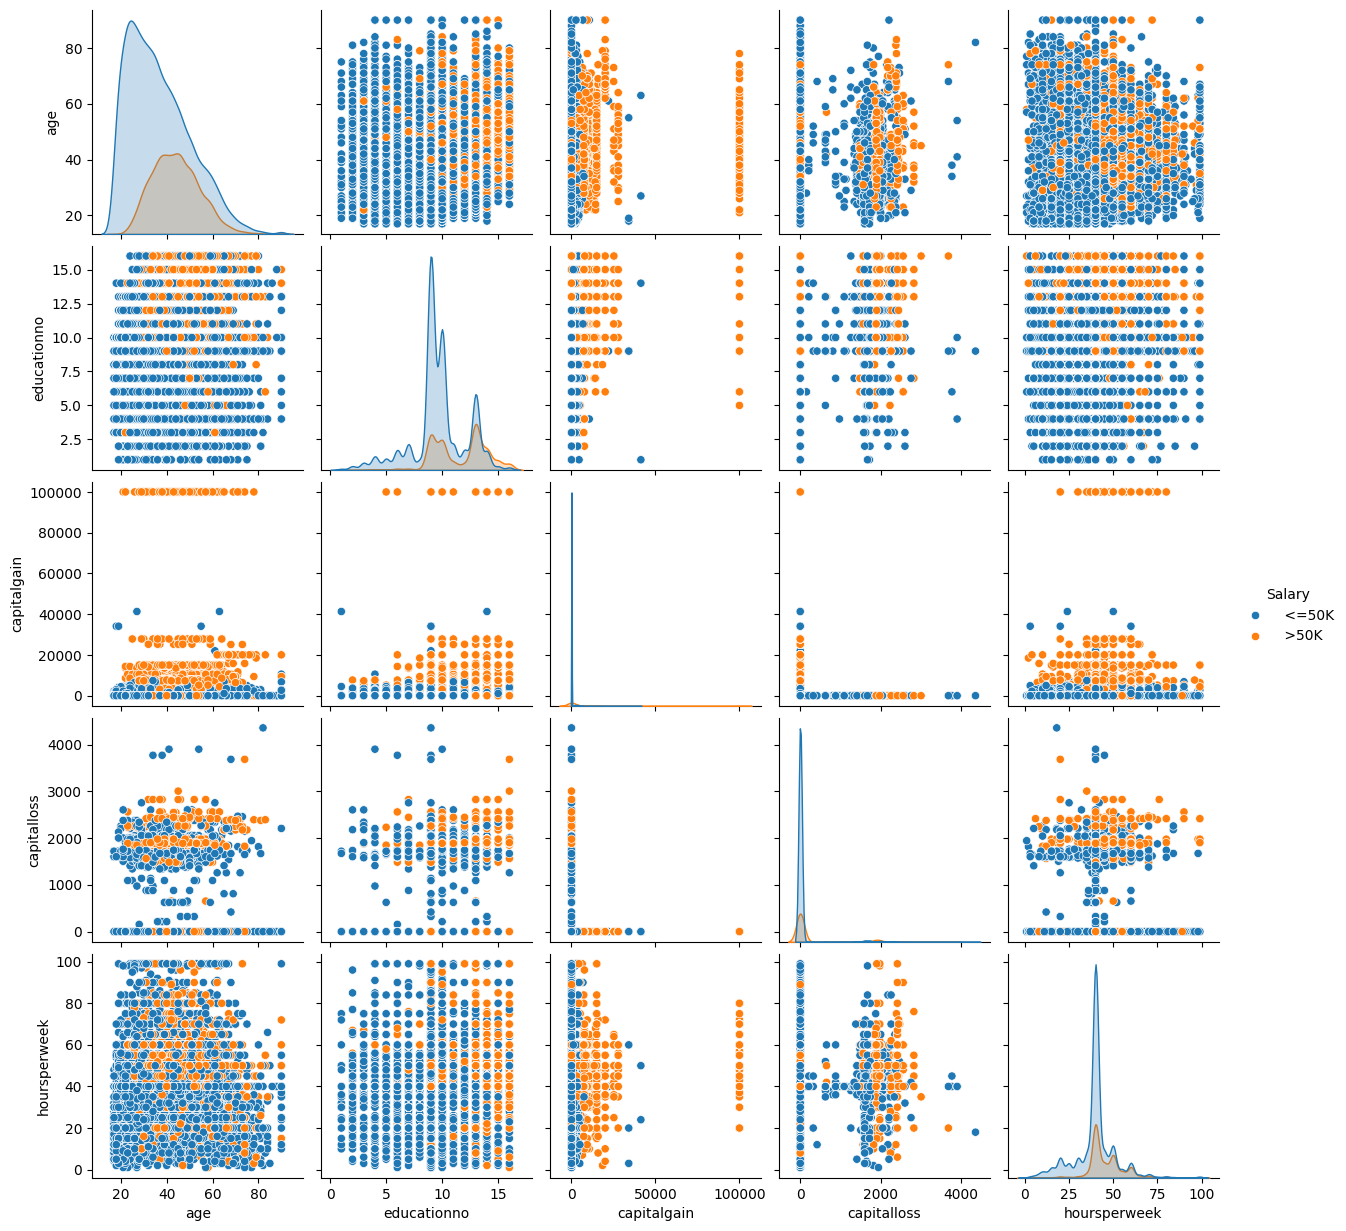

In [ ]:
import seaborn as sns
sns.pairplot(sal_train, hue = 'Salary')

In [ ]:
corr = sal_train.corr()

<ipython-input-5-294d326f48ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sal_train.corr()


In [ ]:
corr

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [ ]:
sal_train[sal_train.isnull().any(axis=1)]


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [ ]:
sal_train.isnull().sum()


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
sal_train['Salary'].unique()


array([' <=50K', ' >50K'], dtype=object)

In [21]:
sal_train['Salary'].isnull().any()

False

In [22]:
sal_train['Salary'].value_counts()


 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

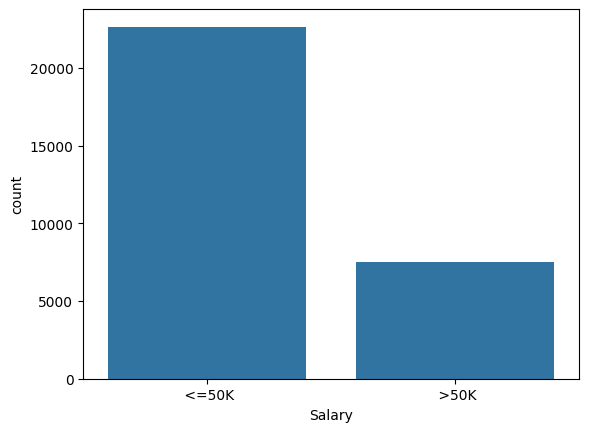

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

sns.countplot(x='Salary',data= sal_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
sal_train['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

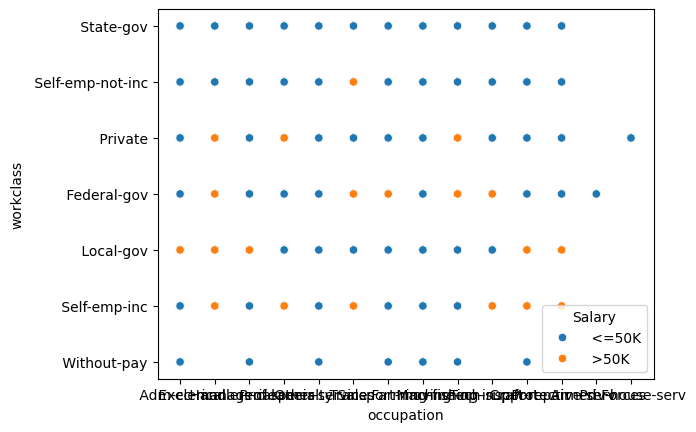

In [ ]:
sns.scatterplot(x = sal_train['occupation'],y = sal_train['workclass'],hue=sal_train['Salary'])


In [6]:
sal_test = pd.read_csv('/content/SalaryData_Test(1).csv')

In [7]:
sal_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
sal_test['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
sal_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native",'Salary']


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
##Preprocessing the data. As, there are categorical variables
le = LabelEncoder()
for i in string_columns:
        sal_train[i]= le.fit_transform(sal_train[i])
        sal_test[i]= le.fit_transform(sal_test[i])

In [13]:
sal_train['Salary'].unique()

array([0, 1])

In [14]:
##Capturing the column names which can help in futher process
colnames = sal_train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [15]:
x_train = sal_train[colnames[0:13]]
y_train = sal_train[colnames[13]]
x_test = sal_test[colnames[0:13]]
y_test = sal_test[colnames[13]]

In [33]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [34]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int64

In [35]:
y_train.unique()

array([0, 1])

In [16]:
##Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [17]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)


In [18]:
print(x_train.dtypes)
print(y_train.dtypes)

age              float64
workclass        float64
education        float64
educationno      float64
maritalstatus    float64
occupation       float64
relationship     float64
race             float64
sex              float64
capitalgain      float64
capitalloss      float64
hoursperweek     float64
native           float64
dtype: object
int64


In [19]:
for i, value in enumerate(y_train):
    try:
        pd.to_numeric(value)
    except ValueError:
        print(f"Problematic value at index {i}: {value}")

In [20]:
x_train = x_train.apply(pd.to_numeric)
y_train = y_train.apply(pd.to_numeric)

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int64

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cm)
print(acc)

[[11003   357]
 [ 2507  1193]]
0.8098273572377158


### Grid Search CV

In [26]:
clf1 = SVC()
param_grid1 = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(clf1, param_grid1, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [27]:
grid_search.best_params_ , grid_search .best_score_

({'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}, 0.8439376917229332)

In [30]:
clf2 = SVC(C= 100, gamma = 0.1, kernel= 'rbf')
clf2.fit(x_train , y_train)
y_pred2 = clf2.predict(x_test)
acc2 = accuracy_score(y_test, y_pred2) * 100
print("Accuracy =", acc2)
confusion_matrix(y_test, y_pred2)

Accuracy = 84.37583001328022


array([[10594,   766],
       [ 1587,  2113]])

In [29]:
acc2

84.37583001328022